# ENGR222 Lab 2 - Numerical differentiation and integration

**Brendan Harding, Victoria University of Wellington**

**Last updated: 26th Feb 2020**


## Introduction

Welcome to your second ENGR222 computer lab.
The aim of this lab is to introduce you to some methods for numerically approximating derivatives and integrals.

Thinking back on what you know about differentiation and integration, you probably recall that you learnt about differentiation first and that caclulating derivatives is typically much easier than calculating integrals.
In contrast, when we attempt to do both of these things numerically, it turns out that getting a **good** approximation of an integral is generally easier than getting a good approximation of a derivative.

Before we get started, let's import matplotlib and numpy as we'll use them throughout.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical approximation of derivatives

Recall that the derivative of $y=f(x)$ is defined as
$$\frac{dy}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h} \,.$$
The simplest way to approximate a derivative is to just pick a small value of $h$ and then take
$$\frac{dy}{dx}\approx\frac{f(x+h)-f(x)}{h}\,.$$
Seems simple right?

Lets try it out for $f(x)=x^3$ at $x=2$ for some small $h$ values. 
(Note that we expect $\frac{dy}{dx}=3x^2$ to be $12$ at $x=2$).

In [3]:
f = lambda x:x**3
x = 2
for h in [1.0,0.1,0.01,0.001,0.0001]:
    dydx = (f(x+h)-f(x))/h
    print(dydx)

19.0
12.61000000000001
12.060099999999707
12.006000999997823
12.000600010022566


Everything seems okay so far, and we can see the estimate gets better with smaller values of $h$.

So let's keep going.

In [5]:
k = np.arange(21)      # integers 0 to 20
h = 0.1**k             # numbers 1,0.1,0.01,... down to 0.1^20
dydx = (f(x+h)-f(x))/h # array of dydx estimates
print(dydx)

[19.         12.61       12.0601     12.006001   12.00060001 12.00006
 12.000006   12.00000058 11.99999993 12.00000099 12.00000099 12.00000099
 12.00106681 11.99040867 12.25686219 10.65814104  0.          0.
  0.          0.          0.        ]


Woah!!! 

What happenned here?

Our estimate was getting more accurate, then suddenly started getting worse, and then became zero!

Since we know the exact answer is 12 we can calculate the error and plot it against $h$ on a loglog scale (we can plot on a loglog scale using `plt.loglog(x,y)` rather than `plt.plot(x,y)`).

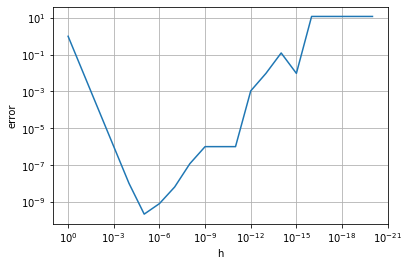

In [65]:
error = np.abs(dydx-12.0)
plt.loglog(h,error)
plt.gca().invert_xaxis() # plots smaller h going to the right
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

You can see that as $h$ got smaller we initially got a better result, up to about $h=10^{-7}$ giveng the smallest error of order of magnitude $10^{-7}$.

Initially that decay in error also follows a straight line on the log-log plot.
Every time we decreased $h$ by a factor of $10$ our error also decreased by a factor of $10$.

However, for $h$ smaller than $10^{-7}$ our error began to become worse, eventually we got a result of $0$ which meant out error was $12$.

#### Excercise

 - Try finding the derivative of $y=\sin(x)$ at $x=1$ using the same process. Taking `np.cos(1)` to be the expected exact result, calculate the error and plot it as a function of $h$ as we did above. In a few words describe what you observe.
 - Repeat this exercise again for a function of your own choosing.
 

[0.06782644 0.49736375 0.53608598 0.53988148 0.54026023 0.5402981
 0.54030189 0.54030226 0.5403023  0.54030236 0.54030225 0.54030114
 0.54034555 0.53956839 0.54400928 0.55511151 0.         0.
 0.         0.         0.        ]
0.5403023058681398


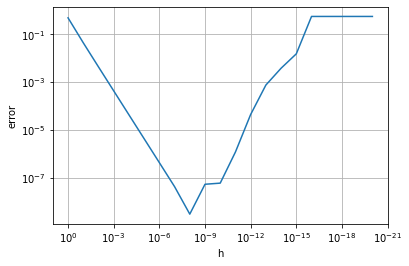

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f1 = lambda x:np.sin(x)
k1 = np.arange(21)
h1 = 0.1**k1
x1 = 1
dydx1 = (f1(x1 + h1) - f1(x1))/h1
print(dydx1)
print(np.cos(1))
err1 = np.abs(dydx1 - np.cos(1))
plt.loglog(h1, err1)
plt.gca().invert_xaxis()
plt.xlabel("h")
plt.ylabel("error")
plt.grid()
plt.show()

# Error graph shows similar results; error slowly goes down as h approaches 0,
# minimising around 10^-7 before increasing

[0.69314718 0.9531018  0.99503309 0.99950033 0.99995    0.999995
 0.9999995  0.99999995 0.99999999 1.00000008 1.00000008 1.00000008
 1.0000889  0.99920072 0.99920072 1.11022302 0.         0.
 0.         0.         0.        ]
1.0


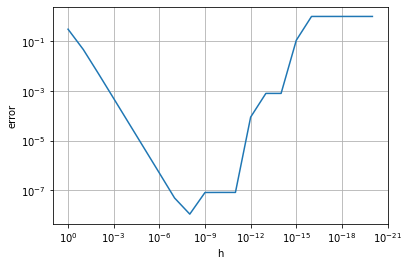

In [13]:
f2 = lambda x:np.log(x)
k2 = np.arange(21)
h2 = 0.1**k2
x2 = 1
dydx2 = (f2(x2 + h2) - f2(x2))/h2
print(dydx2)
print(1/x2)
err2 = np.abs(dydx2 - 1)
plt.loglog(h2, err2)
plt.gca().invert_xaxis()
plt.xlabel("h")
plt.ylabel("error")
plt.grid()
plt.show()

## Understanding the issue

So what exactly is going on here.

There are two effects at play. 
One is that the *truncation error* decreases with decreasing $h$.
The second is that for small $h$ our calculation suffers from *catastrophic cancellation*.

We'll look at these in a bit of detail to understand the difficulty with numerical differentiation.

### Truncation error

To understand truncation error, recall that for a smooth function its Taylor series about $x=a$ is
$$
f(x)=f(a)+(x-a)f'(a)+\frac{1}{2}(x-a)^2f''(a)+\frac{1}{6}(x-a)^3f^{(3)}(a)+\dots \,.
$$
We can truncate this series and introduce the *Lagrange form of the remainder*,
$$
f(x) = f(a)+(x-a)f'(a)+\frac{1}{2}(x-a)^2f''(\xi)
$$
for some $\xi$ between $a$ and $x$.

Observe this is exact and the specific $\xi$ depends on $x$.

We can re-arrange this equation to obtain
$$
\frac{f(x)-f(a)}{x-a}=f'(a)+\frac{1}{2}(x-a) f''(\xi) \,.
$$
If we let $x=a+h$ then we have
$$
\frac{f(a+h)-f(a)}{h}=f'(a)+\frac{h}{2} f''(\xi) \,.
$$
If we can find an upper bound $|f''(\xi)|\leq M$ between $a$ and $a+h$ then we have
$$
\left|\frac{f(a+h)-f(a)}{h}-f'(a)\right|=\left|\frac{h}{2}f''(\xi)\right|\leq \frac{h}{2}M \,.
$$
The left side is simply the error of our estimate of the derivative for a given $h$ and the right side gives us a bound on this error.

Therefore, wee predict from this that the error of our estimate should decrease in proportion to $h$ (as it appear on the right side and we can take $M$ to be fixed).

This is exactly what we observed on the left side of our error plots previously!

#### Example

For our previous example $f(x)=x^3$ we have $f''(x)=6x$ so if we examine $f''(x)$ over $[2,3]$ say (as we are interested in the derivative at $a=2$ and tried different values of $h\leq 1$), then $|f''(x)|\leq 18$.

So we can expect the error of our estimate of the derivative to be less than $\frac{h}{2}\times18=9h$.

Let's plot $9h$ alongside the error to have a look.

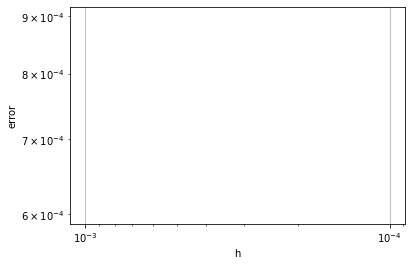

In [12]:
f = lambda x:x**3
x = 2
dydx = (f(x+h)-f(x))/h
error = np.abs(dydx-12.0)
plt.loglog(h,error)
plt.loglog(h,9*h)
plt.gca().invert_xaxis() # plots smaller h going to the right
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

Wow, look at that, we predicted the error in the initial part of the graph almost exactly!

#### Exercise

 - Find $M$ in the case of $f(x)=\sin(x)$ at $a=1$ and produce a plot similar to that above.
 - Repeat this again for your own function that you considered earlier.
 


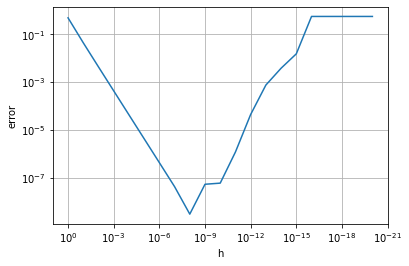

In [15]:
f1 = lambda x:np.sin(x)
k1 = np.arange(21)
h1 = 0.1**k1
x1 = 1
dydx1 = (f1(x1 + h1) - f1(x1))/h1
err1 = np.abs(dydx1 - np.cos(1))

plt.loglog(h1, err1)
plt.loglog(h , h)
plt.gca().invert_xaxis()
plt.xlabel("h")
plt.ylabel("error")
plt.grid()
plt.show()

### Catastrophic cancellation 

Okay, the theory says the error should continue to get smaller indefinitely, so why doesn't it?

The reason is that we are not computing with the real numbers, but rather using *floating point numbers* as approximations to the reals.

Recall in the previous lab I described floating point numbers as having the form
$$(\text{floating point number})=(\text{sign})\times2^{(\text{exponent})}\times(\text{mantissa})$$
where the mantissa has a finite number of binary digits (52 typically).

When we subtract two numbers which have the same sign and exponent we effectively lose some number of digits in the mantissa.
This is known as *cancellation error*.

Suppose for a moment our mantissa has only 20 digits and we have two numbers with equal sign and exponent with mantissas
\begin{align*}
m_1 &= 10110011100011110001 \\
m_2 &= 10110011100011010000
\end{align*}
then when we subtract $m_2$ from $m_1$ we obtain
$$m_2-m_1=00000000000000\underline{100001}$$
where the important part of the difference is underlined.
The exponent is then modified so the underline part of the difference is shifted left and *zeros are added to fill the mantissa* (also known as padding), so after this modification we obtain
$$100001\underline{00000000000000}$$
All of those zeros underlined at the end are essentially **incorrect** digits.
The real numbers which $m_1$ and $m_2$ approximate would have had more than 20 binary digits and most likely had non-zero digits in their difference beyond those first 6.

When we get to the stage that we lose most of our digits of accuracy we call this *catastrophic cancellation*.

Why does cancellation affect our estimate of the derivative?

For very small $h$ we expect $f(x+h)$ and $f(x)$ to be very similar numbers (assuming $f(x)$ is continuous).
Therefore, as $h$ gets smaller, more and more of the leading digits in the mantissa will match, which leads to just of many binary digits of accuracy being lost when we calculate the difference.

Eventually, for very small $h$ the approximation of $f(x+h)$ is identical to the approximation of $f(x)$ and so the difference is zero!

#### Exercise

 - Play around with the following cell to see how for $f(x)=x^3$ the numerical approximation of $f(a+h)-f(a)$ differs from that obtained if we expand $(a+h)^3-a^3$ removing the common a^3 term. Look at how many of the decimal digits are correct for different `h=0.1**k`.


In [20]:
h = 0.1**5
a = 2.0
y0 = a**3
y1 = (a+h)**3
nd = y1-y0                  # numerical/approximate difference
td = 3*a**2*h+3*a*h**2+h**3 # true difference
print(nd)
print(td)

0.00012000060000261215
0.00012000060000100003


### The great balancing act

So how can we choose $h$ to obtain a good estimate of a derivative in general?
Unfortunately the best $h$ varies greatly depending on the function $h$, so we can't just say the $h=10^{-7}$ will be always be the best based on our investigation of one example above.

Choosing the right size of $h$ is a balancing act, much like heating Goldilocks' soup.

If $h$ is not small enough then you will have a less accurate solution due to truncation error, but if $h$ is too small then you will get a less accurate solution due to cancellation error.

Ideally we would always estimate a derivative for many $h$ and choose the one that has the least error (although you need to consider how we would estimate the error if we didn't already know the true derivative).

A very simple approach is to estimate $\frac{dy}{dx}$ for two similar values of $h$. 
If they give a similar result, up to some desired number of digits, we can say we are happy with the estimate and move on. 
Otherwise we need to try a larger of smaller $h$ depending on whether we think the main source of error is truncation or cancellation error.

#### Exercise

 - Via some trial and error, find the $h$ that gives the best estimate of the derivative of $f(x)=e^x$ at $x=2$. Then produce a plot of the error versus $h$ similar to above and see how the value of $h$ you found compares with that in the plot.
 - Repeat the above for $f(x)=\ln(x)$ at $x=10$.
 - Repeat the above for another function of your choosing.
 


In [23]:
f1 = lambda x:np.exp(x)
h1 = 0.1**np.arange(0, 21)
a = 2

dydx1 = (f1(a + h1) - f1(a))/h1

diff = np.abs(dydx1[1:] - dydx[:-1])

plt.loglog(h1, diff)
plt.gca().invert_xaxis()
plt.xlabel("h")
plt.ylabel("error")
plt.grid()
plt.show()

TypeError: 'float' object is not subscriptable

## Better estimates of the first derivative

The approximation
$$\frac{dy}{dx}\approx\frac{f(x+h)-f(x)}{h}$$
is the simplest example of a large class of methods for approximating derivatives known as finite difference methods.

Alternative finite differences can be used to estimate $\frac{dy}{dx}$ more accurately, or to estimate higher derivatives like $\frac{d^2y}{dx^2}$, $\frac{d^3y}{dx^3}$ and so on.

The basis for all of these is the Taylor series.
For example, the second order estimate
$$\frac{dy}{dx}\approx\frac{f(x+h)-f(x-h)}{2h}$$
has error proportional to $h^2$ and can be derived by noting that
\begin{align*}
f(a+h)&=f(a)+hf'(a)+\frac{1}{2}h^2f''(a)+\frac{1}{6}h^3f^{(3)}(a)+\dots \,, \\
f(a-h)&=f(a)-hf'(a)+\frac{1}{2}h^2f''(a)-\frac{1}{6}h^3f^{(3)}(a)+\dots \,.
\end{align*}
Therefore, taking $f(a+h)-f(a-h)$ cancels both the $f(a)$ and $f''(a)$ terms leaving
$$f(a+h)-f(a)=2hf'(a)+\frac{1}{3}h^3f^{(3)}(a)+\dots$$
which we can divide through by $2h$ to obtain
$$\frac{f(a+h)-f(a)}{2h}=f'(a)+\frac{1}{6}h^2f^{(3)}(a)+\dots$$
On the right side we have $f'(a)$ plus all the terms which contribute to the error.

If we truncated the original series using an explicit form of the remainder then we could obtain a bound just as we did before.
The main observation we can make here is that if $h$ is small then $\frac{1}{6}h^2f^{(3)}(a)$ will be the largest contribution to the truncation error (the other terms hidden in the "$+\dots$" have higher powers of $h$).
Because of this we expect the error to be proportional to $h^2$ for small $h$.

Let's try it out on our previous example where $f(x)=x^3$.
We'll again plot the error and compare this with $h^2$.

[13.         12.01       12.0001     12.000001   12.00000001 12.
 12.         11.99999999 11.99999988 12.00000099 12.00000099 12.00000099
 12.00106681 11.99040867 12.12363543 11.99040867  0.          0.
  0.          0.          0.        ]


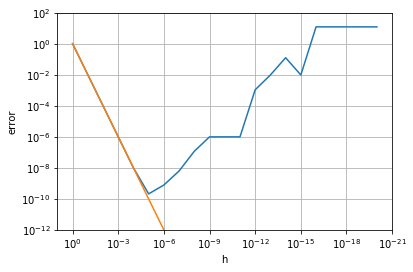

In [63]:
f = lambda x:x**3
k = np.arange(21)      # integers 0 to 20
x = 2.0
h = 0.1**k             # numbers 1,0.1,0.01,... down to 0.1^20
dydx = (f(x+h)-f(x-h))/(2*h) # array of dydx estimates
print(dydx)

error = np.abs(dydx-12.0)
plt.loglog(h,error)
plt.loglog(h,h**2)  # our reference error curve
plt.ylim(1E-12,1E2) # restrict the y range
plt.gca().invert_xaxis() 
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

You can see our error very nicely follows the $(h,h^2)$ curve initially, but again eventually suffers from cancellation error.

The main point of a more accurate method such as this is that the error decreases much more quickly with respect to $h$.
In this case $h=10^{-5}$ gives our best estimate which has error approximately $10^{-10}$ (previously $h^{-7}$ was best with error approximately $10^{-7}$).

Finite differences will always suffer from cancellation eventually, it cannot be avoided.
For this reason we say it is an *unstable numerical method*.
The best we can do is improve how quickly the initial part of the error curve goes to zero and try to avoid choosing $h$ too small.

#### Exercises:

 - Apply the improved finite difference method to estimate the derivative of $\sin(x)$ at $x=1$. Plot the error vs $h$ and make some comments on what you observe.
 - Repeat the above for some of the other functions you have considered so far.


[0.45464871 0.53940225 0.5402933  0.54030222 0.5403023  0.54030231
 0.54030231 0.54030231 0.54030231 0.5403023  0.54030225 0.54030114
 0.54029003 0.5401235  0.54400928 0.55511151 0.55511151 0.
 0.         0.         0.        ]


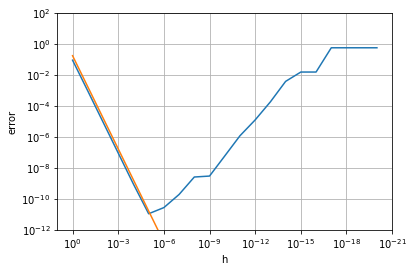

In [29]:
f = lambda x:np.sin(x)
k = np.arange(21)
x = 1.0
h = 0.1**k
dydx = (f(x+h)-f(x-h))/(2*h)

error = np.abs(dydx-np.cos(1))
plt.loglog(h,error)
plt.loglog(h,h**2/6)
plt.ylim(1E-12,1E2)
plt.gca().invert_xaxis() 
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

We won't go into finite differences in much more detail, but here is a few more formula for estimating a first derivative:
\begin{align*}
\frac{dy}{dx}&\approx\frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} &&\text{(error proportional to $h^2$ initially)} \\
\frac{dy}{dx}&\approx\frac{2f(x-2h)-9f(x+2h)+18f(x+h)-11f(x)}{6h} &&\text{(error proportional to $h^3$ initially)}\\
\frac{dy}{dx}&\approx\frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)}{12h} &&\text{(error proportional to $h^4$ initially)}
\end{align*}
 
#### Exercises

 - Try these formula out on some of the examples you've already considered. Plot the error and try to confirm the initial part decays at the rate indicated.

#### Challenge question

 - Try to derive one or more of these formula by examining the Taylor series corresponding approximations of each of $f(x-2h),f(x-h),f(x+h),f(x+2h)$.

### Estimating 2nd order derivatives

Recall earlier we examined the Taylor series
\begin{align*}
f(a+h)&=f(a)+hf'(a)+\frac{1}{2}h^2f''(a)+\frac{1}{6}h^3f^{(3)}(a)+\frac{1}{24}h^4f^{(4)}(a)+\dots \,, \\
f(a-h)&=f(a)-hf'(a)+\frac{1}{2}h^2f''(a)-\frac{1}{6}h^3f^{(3)}(a)+\frac{1}{24}h^4f^{(4)}(a)+\dots \,,
\end{align*}
to derive a better approximation of the first derivative (although I've added a fourth derivative term here).

We can examine this again, with the aim of cancelling $f'(a)$ and then manipulate to obtain an approximation of $f''(a)$.
In particular, observe that adding the two together cancels all odd derivatives of $f$ on the right side, that is
$$f(a+h)+f(a-h)=2f(a)+h^2f''(a)+\frac{1}{12}h^4f^{(4)}(a)+\dots$$
and re-arranging we have 
$$\frac{f(a+h)-2f(a)+f(x-h)}{h^2}=f''(a)+\frac{1}{12}h^2f^{(4)}(a)+\dots$$
This formula shows that the left side is an approximation of $f''(a)$ where for small $h$ the most significant part of the error is $\frac{1}{12}h^2f^{(4)}(a)$.

Therefore
$$\frac{d^2y}{dx^2}\approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$
with error proportional to $h^2$ initially.

Let's try this on the function $f(x)=x^4$ at $x=1.5$ (observing $f''(x)=12x^2$ so that $27$ is the exact result).

[29.         27.02       27.0002     27.000002   27.00000001 26.99999335
 27.00062396 27.00062396 26.64535259  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


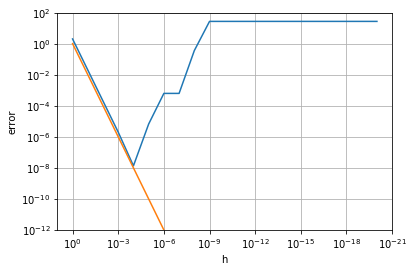

In [62]:
f = lambda x:x**4
k = np.arange(21)      # integers 0 to 20
x = 1.5
h = 0.1**k             # numbers 1,0.1,0.01,... down to 0.1^20
d2ydx2 = (f(x+h)-2*f(x)+f(x-h))/(h**2) # array of dydx estimates
print(d2ydx2)

error = np.abs(d2ydx2-27)
plt.loglog(h,error)
plt.loglog(h,h**2)  # our reference error curve
plt.ylim(1E-12,1E2) # restrict the y range
plt.gca().invert_xaxis() 
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

You can see the usual pattern of the error initially decreasing as expected before cancellation error takes over.
Here choosing $h=10^{-4}$ gives us the smallest error of roughly $10^{-8}$.

Note that if we try our function $f(x)=x^3$ in this case at $x=2$ then our error is initially very small and only gets worse as the cancellation error increases.

[ 1.20000000e+01  1.20000000e+01  1.20000000e+01  1.20000000e+01
  1.20000003e+01  1.20000099e+01  1.20028432e+01  1.18127730e+01
  8.88178420e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.66453526e+13 -2.66453526e+15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


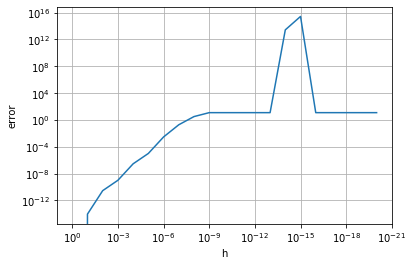

In [61]:
f = lambda x:x**3
k = np.arange(21)      # integers 0 to 20
x = 2.0
h = 0.1**k             # numbers 1,0.1,0.01,... down to 0.1^20
d2ydx2 = (f(x+h)-2*f(x)+f(x-h))/(h**2) # array of dydx estimates
print(d2ydx2)

error = np.abs(d2ydx2-12)
plt.loglog(h,error)
plt.gca().invert_xaxis() 
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

The reason for this is that the leading error term in the Taylor series includes $f^{(4)}(x)$ which is zero in this particular case (as are all of the higher derivatives).

Consequently, the method has no truncation error for this particular example.

This is a general feature of finite difference methods, that they are exact (excluding the cancellation error) for polynomials with degree smaller than the order of the derivative in the leading error term.

For an $n$'th order method approximating the $k$'th derivative, the leading error term involves $f^{(n+k)}(x)$ which means the method is exact for polynomials of degree less than $n+k$.

#### Exercises

 - Test this assertion about polynomials using the more accurate methods for estimating the first order derivative that were previously described.
 - Try the formula for estimating the second derivative on some of the other function that you have considered previously, e.g. starting with estimating the second derivative of $f(x)=\sin(x)$ at $x=1$ and examining the error as a function of $h$.


Just as there were many other formula for estimating the first derivative, there are many formula for estimating the second derivative.
Without going into details, here are a few of them.
\begin{align*}
\frac{d^2y}{dx^2}&\approx\frac{f(x+2h)-2f(x+h)+f(x)}{h^2} &&\text{(error proportional to $h$ initially)} \\
\frac{d^2y}{dx^2}&\approx\frac{-f(x+3h)+4f(x+2h)-5f(x+h)+2f(x)}{h^2} &&\text{(error proportional to $h^2$ initially)}\\
\frac{d^2y}{dx^2}&\approx\frac{-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)}{12h^2} &&\text{(error proportional to $h^4$ initially)}
\end{align*}

#### Exercise

 - Try a few of these out on the functions we have considered previously, e.g. try $f(x)=x^4$, $f(x)=\sin(x)$ to start with.
 
#### Challenge question

 - See if you can demonstrate that $\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$ approximates $\frac{d^2y}{dx^2}$ with a leading error term proportional to $h$ by examining the Taylor series of $f(x+2h)$ and $f(x+h)$.
 - See if you can derive on or more of the other formulas.

### Estimating 3rd and higher derivatives

Without going into details, here are a couple of examples of formula for estimating higher order derivatives.
\begin{align*}
\frac{d^3y}{dx^3}&\approx\frac{-f(x-2h)+2f(x-h)-2f(x+h)-f(x+2h)}{2h^3} &&\text{(error proportional to $h^2$ initially)}\\
\frac{d^4y}{dx^4}&\approx\frac{f(x-2h)-4f(x-h)+6f(x)-4f(x+h)+f(x+2h)}{h^4} &&\text{(error proportional to $h^2$ initially)}
\end{align*}

#### Exercise

 - Try these out on a couple of the functions considered previously.
 - Do you notice a pattern for the best $h$ when estimating higher derivatives based on the examples considered here?
 

---

## Numerical integration

Somewhat surprisingly, numerical integration is much better behaved than numerical differentiation.
We don't generally encounter pesky cancellation error which means it is much easier to come up with algorithms which are *stable*.



The simplest approach to numerical integration is to calculate the Riemann sums which approximate the area under a curve that correponds to an integral.
For example, breaking $[a,b]$ into $n$ equal pieces of length $h=\frac{b-a}{n}$ and using the left function values to form rectangles, then we have the **left Riemann sum**
$$\int_{a}^{b}f(x)\,dx\approx \sum_{i=0}^{n-1}h\,f\left(a+ih\right)\,.$$

Of course, we can do a little better and use trapezoids rather rectangles to obtain the **trapezoidal rule** (which many of you should recall fro ENGR122):
\begin{align*}
\int_{a}^{b}f(x)\,dx
&\approx \sum_{i=0}^{n-1}\frac{h}{2}\left(f\left(a+ih\right)+f\left(a+(i+1)h\right)\right) \\
&=\frac{h}{2}(f(a)+f(b))+h\sum_{i=1}^{n-1}f\left(a+ih\right) \,.
\end{align*}

Even better again is to use **Simpson's rule**, which for an even number $n$ is
\begin{align*}
\int_{a}^{b}f(x)\,dx
&\approx \sum_{i=0}^{n/2-1}\frac{h}{3}\left(f\left(a+2ih\right)+4f\left(a+(2i+1)h\right)+f\left(a+(2i+2)h\right)\right) \\
&=\frac{h}{3}(f(a)+f(b))+\frac{4h}{3}\sum_{i=0}^{n/2-1}f\left(a+(2i+1)h\right)+\frac{2h}{3}\sum_{i=1}^{n/2-1}f\left(a+(2i+1)h\right) \,.
\end{align*}

We can calculate all of these approximations easily using numpy.
We'll have a go at this and then discuss the error associated with each method.

### Implementing the left Riemann sum

To estimate the left Riemann sum using numpy we do the following

 - First discretise $[a,b]$ find the $n+1$ endpoints of the $n$ equal pieces via `x=np.linspace(a,b,n+1)`
 - Define the function $f(x)$ and sample it at each end point via `y=f(x)`
 - The values at the left end points are then `y[:-1]`
 - Take the sum of the left end points and multiply by $h=\frac{b-a}{n}$, i.e. `y[:-1].sum()*(b-a)/n`.
 
Here is an example for the function $f(x)=x^3$ over $[0,3]$.

In [13]:
a = 0
b = 3
n = 10
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
riemann_sum = y[:-1].sum()*(b-a)/n
print(riemann_sum)

16.402499999999996


#### Exercise

 - Try implementing this algorithm for estimating the integrals $\int_{0}^{1}e^x\,dx$ and $\int_{0}^{\pi}\sin(x)\,dx$.
 - In each case try some different values of $n$ and see how the approximation compared to the true result.
 - Modify the algorithm to use the right hand end point of each sub-interval rather than the left.

In [35]:
a = 0
b = 1
n = 1000
x = np.linspace(a,b,n+1)
f = lambda x:np.exp(x)
y = f(x)
riemann_sum = y[:-1].sum()*(b-a)/n
print(riemann_sum)



1.717422830734966


### Implementing the trapezoidal rule

Let's now modify our algorithm to estimate the integral using the trapezoidal rule.

 - We can start by calculating our endpoints `x` and samples `y` the same as before.
 - Then, the array `(y[:-1]+y[1:])*h/2` gives the area under each of the $n$ trapezoids, which we just need to add up.
 
Can you see why `(y[:-1]+y[1:])*h/2` gives the area of each trapezoid?
 
Here is an example, again calculating the integral of $f(x)=1-x^2$ over $[-1,1]$. 

In [16]:
a = 0
b = 3
n = 10
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
trapezoidal_rule = (y[1:]+y[:-1]).sum()*h/2
print(trapezoidal_rule)

20.452499999999993


Alternatively, we can calculate the trapezoidal rule by adding up $h$ times the sum of `y[1:-1]` and then add $h/2$ times `y[0]+y[-1]`.

#### Exercise

 - Implement this alternative computation of the trapezoidal rule and check you get the same result.

In [36]:
a = 0
b = 3
n = 10
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
trapezoidal_rule = (y[1:-1]).sum()*h + h/2*(y[0] + y[-1])
print(trapezoidal_rule)

20.4525


Actually, we didn't need to implement the trapezoidal rule this ourselves.

Numpy has a built-in `trapz(y,x)` functions which calculates the trapezoidal rule based on the function values `y` at each `x`.

Let's try this and see if we get the same result.

In [18]:
a = 0
b = 3
n = 10
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
print(np.trapz(y,x))

20.4525


#### Exercise

 - Try using `np.trapz` to estimate the integrals $\int_{0}^{1}e^x\,dx$ and $\int_{0}^{\pi}\sin(x)\,dx$.
 - Again repeat this for several $n$ and examine how close the approximation is to the true result in each case.
 

In [37]:
a = 0
b = 1
n = 10
x = np.linspace(a,b,n+1)
f = lambda x:np.exp(x)
y = f(x)
print(np.trapz(y,x))

1.7197134913893146


In [41]:
a = 0
b = np.pi
n = 10
x = np.linspace(a,b,n+1)
f = lambda x:np.sin(x)
y = f(x)
print(np.trapz(y,x))

1.9835235375094544


### Implementing Simpson's rule

Let's now consider implementing Simpson's rule.

This is a little trickier because the coefficients vary depending on whether the index is odd or even. 
Using the indexing notation `[::2]` will be useful to pick out every second element.

We need to add up $h/3$ times `y[0]+y[-1]`, and $4h/3$ times the sum `y[1::2]` and $2h/3$ times the sum of `y[2:-1:2]`.

Think about why we specifically need the 1 in `y[1::2]` and the `2:-1` in `y[2:-1:2]`.

Here is an implementation of the above.
Note that I include a line `assert n%2==0` which will raise an "assertion error" if $n$ is not dividible by 2.

In [20]:
a = 0
b = 3
n = 10
assert n%2==0
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
simpsons_rule = h/3*(y[0]+y[-1])+4*h/3*y[1::2].sum()+2*h/3*y[2:-1:2].sum()
print(simpsons_rule)

20.249999999999993


The result happens to be very close to the exact result in this case (and will be for any even $n>0$). We'll discuss why shortly.

#### Exercises

 - Apply Simpson's rule to to estimate the integrals $\int_{0}^{1}e^x\,dx$ and $\int_{0}^{\pi}\sin(x)\,dx$.
 - Examine how close it gets to the true result for increasing $n$ in each case.

Again, it turns out we didn't need to implement Simpson's rule by hand.
In this case it is implemented in the `scipy.integrate` module.

Scipy is a rather big library, and generally we only want to use some select functions from it.
For this reason we typically import scipy a little differently to say numpy and matplotlib.
Here we will import only the specific function we intend to use via `from scipy.integrate import simps`.
It need only be imported once, so we could have done this at the start of the notebook, but it is also fine to import now.

The following example imports the `simps` function and applies it to estimate the integral of $f(x)=x^3$ over $[0,3]$ as above.

In [43]:
from scipy.integrate import simps
a = 0
b = 3
n = 10
assert n%2==0
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:x**3
y = f(x)
print(simps(y,x))

20.25


#### Exercise

 - Use `simps` to estimate $\int_{0}^{1}e^x\,dx$ and $\int_{0}^{\pi}\sin(x)\,dx$ and confirm you get the same result as before (possibly up to a very small rounding error).

In [45]:
a = 0
b = 1
n = 10
assert n%2==0
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:np.sin(x)
y = f(x)
print(simps(y,x))

a = 0
b = 1
n = 10
assert n%2==0
h = (b-a)/n
x = np.linspace(a,b,n+1)
f = lambda x:np.exp(x)
y = f(x)
print(simps(y,x))

0.4596979498238205
1.7182827819248232


### Errors in numerical integration

Okay, we have seen now that each of the three methods produce an approximation whose error gets smaller as we increase $n$. The specific rate at which the error decreases is different for each method though.

For example, the integral of $f(x)=e^x$ over $[0,1]$ is exactly $e-1$.
Below we plot the error as a function of $n$, see if you can understand all of the code here.

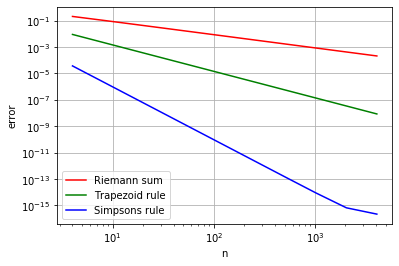

In [60]:
a = 0
b = 1
f = lambda x:np.exp(x)
ns = 2**np.arange(2,13) # array of n values [4,8,16,32,...,4096]
hs = (b-a)/ns # array of h values for each n
xs = [np.linspace(a,b,n+1) for n in ns] # array of endpoints for each n
ys = [f(x) for x in xs] # array of function values for each n
integral = np.exp(1.0)-1.0 # exact result of integral
LRS = [] # initialise empty list for the left Riemann sums
TR = []  # initialise empty list for the trapezoidal rule
SR = []  # initialise empty list for Simpson's rule
for i in range(len(ns)):
    # each iteration calculates the three estimates for n=ns[i]
    h = hs[i]
    x = xs[i]
    y = ys[i]
    LRS.append(y[:-1].sum()*h)
    TR.append(np.trapz(y,x))
    SR.append(simps(y,x))
plt.loglog(ns,np.abs(LRS-integral),'r-',label='Riemann sum')
plt.loglog(ns,np.abs(TR-integral),'g-',label='Trapezoid rule')
plt.loglog(ns,np.abs(SR-integral),'b-',label='Simpsons rule')
plt.xlabel('n')
plt.ylabel('error')
plt.legend(loc='lower left')
plt.grid()
plt.show()

You can see that the error of Simpson's rule converges towards zero the fastest, the trapezoidal rule converges to zero the second fastest, and the left Riemann sum converges to zero the slowest.

To understand the decay in error we can again look towards the Taylor polynomials which approximate $f(x)$.
We'll start by examining the error associated with the left Riemann sum.

### Error of the left Riemann sum approximation

The left Riemann sum can be understood as approximating $f(x)$ as constant function on each sub-interval and then integrating that approximation exactly (ignoring floating point rounding errors).

On the $i$'th interval having width $h=\frac{b-a}{n}$ we have
$$f(x)\approx f(a+(i-1)h)$$
and so the contribution to the integral from this sub-interval is
$$\int_{a+(i-1)h}^{a+ih}f(x)\,dx\approx\int_{a+(i-1)h}^{a+ih}f(a+(i-1)h)\,dx=h\,f(a+(i-1)h)\,.$$
The error accumulated over this sub-interval is
$$\int_{a+(i-1)h}^{a+ih}f(x)-f(a+(i-1)h)\,dx$$.
If we consider a Taylor polyomial approximation of $f(x)$ at $x=a+(i-1)h$ trunated to the $0$th degree with a remainder we have
$$f(x)=f(a+(i-1)h)+hf'(\xi)$$
for some $\xi$ between $a+(i-1)h$ and $x$.
If we determine a bound $|f'(\xi)|\leq M$ for $\xi\in[a,b]$ then we have
$$|f(x)-f(a+(i-1)h)|=|h\,f'(\xi)|\leq h\,M$$
Therefore, the error accumulated over our subinterval is
\begin{align*}
\left|\int_{a+(i-1)h}^{a+ih}f(x)-f(a+(i-1)h)\,dx\right|&\leq \int_{a+(i-1)h}^{a+ih}|f(x)-f(a+(i-1)h)|\,dx\\
&\leq\int_{a+(i-1)h}^{a+ih}h\,M\,dx = h^2\,M \,.
\end{align*}
Now, a similar error is accumulated over each of the $n$ sub-intervals, so the total error is bounded above by
$$n\cdot h^2 M = n\cdot\frac{b-a}{n^2} M = \frac{1}{n}(b-a)M$$
Therefore, we see that the total error of the left Riemann sum proportional to $1/n$ (or equivalently proportional to $h$).

Note that error due to rounding of real numbers to floating point numbers still occur, but these are usually significantly smaller than the error described above (referred to as *truncation error*).
We certainly don't suffer from catastrophic cancellation that was seen with numerical differentiation.

#### Exercise

 - Consider the integrals $\int_{0}^{3}x^3\,dx$, $\int_{0}^{1}e^x\,dx$ and $\int_{0}^{\pi}\sin(x)\,dx$. In each case the number $M$ bounding the derivative of the integrand over the integration interval and check that the error of the Riemann sum is indeed less than the bound described above for a few different $n$.

### Error of the trapezoidal and Simpson's rules

We won't go through the complete details for the more accurate methods, but instead give a quick summary of the main ideas.

The trapezoidal rule can be understood as approximating $f(x)$ as linear over each sub-interval and then integrating this approximation of $f(x)$.
By analysing the 1st degree Taylor polynomial and its remainder over a single interval alongside the linear approximation of $f(x)$ you can obtain an error bound of
$$\frac{1}{12}h^3 M$$
where $|f''(x)|\leq M$ for $x\in[a,b]$.
Once this is accumulated over all $n$ sub-intervals we obtain a final error bound of
$$\frac{1}{n^2}\frac{b-a}{12}N \,.$$
Therefore the error of the trapezoidal rule decays proportional to $1/n^2$, or $h^2$.

Simpson's rule effectively approximates $f(x)$ as a quadratic function over successive pairs of sub-intervals.
Integrating this approximation of $f(x)$ yields Simpson's formula for the integral.
The error analysis becomes increasingly complex involving the 4th Taylor polynomial and its remainder. 
Over a single sub-interval pair the error is proportional to $h^{5}$ which means over the entire integral the accumulated error is proptional to $h^4$, or $1/n^4$.

The following plot illustrates these relationships (with an arbirarily chosen constant) alongside the computed error when approximating $\int_0^1 e^x\,dx$.

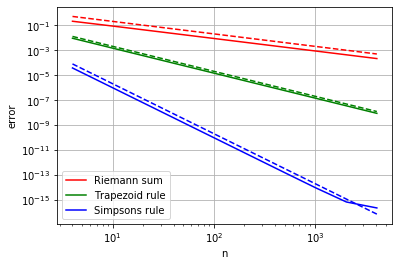

In [58]:
a = 0
b = 1
f = lambda x:np.exp(x)
ns = 2**np.arange(2,13) # array of n values [4,8,16,32,...,4096]
hs = (b-a)/ns # array of h values for each n
xs = [np.linspace(a,b,n+1) for n in ns] # array of endpoints for each n
ys = [f(x) for x in xs] # array of function values for each n
integral = np.exp(1.0)-1.0 # exact result of integral
LRS = [] # initialise empty list for the left Riemann sums
TR = []  # initialise empty list for the trapezoidal rule
SR = []  # initialise empty list for Simpson's rule
for i in range(len(ns)):
    # each iteration calculates the three estimates for n=ns[i]
    h = hs[i]
    x = xs[i]
    y = ys[i]
    LRS.append(y[:-1].sum()*h)
    TR.append(np.trapz(y,x))
    SR.append(simps(y,x))
plt.loglog(ns,np.abs(LRS-integral),'r-',label='Riemann sum')
plt.loglog(ns,2.0/ns,'r--')
plt.loglog(ns,np.abs(TR-integral),'g-',label='Trapezoid rule')
plt.loglog(ns,0.2/ns**2,'g--')
plt.loglog(ns,np.abs(SR-integral),'b-',label='Simpsons rule')
plt.loglog(ns,0.02/ns**4,'b--')
plt.xlabel('n')
plt.ylabel('error')
plt.legend(loc='lower left')
plt.grid()
plt.show()

#### Exercise

 - Confirm that the error follows these same relationships when estimating $\int_{0}^{\pi}\sin(x)\,dx$.
 - Come up with your own whacky function to integrate and check if the error decays according to these relationships described above.\
*(If you can't work out the exact integral of your whacky function, which will be needed to calculate the error for each method, then instead use Simpson's rule with a really big $n$, say $n=10,000$ to approximate the exact result and use this to estimate the error. Don't make $n$ too big though or the computation will start to take too much time and computer memory!)*
 - A method which converge at a rate $1/n^k$ will give an exact result (up to rounding error) for polynomials up to degree $k$. Try to confirm this by checking the error when you multiply a variety of polynomials using the above methods.
 

### Other numerical integration formula.

There are many other algorithms for estimating integrals.
Numerical integration methods are somteimes referred to as quadrature rules (historically *quadrature* refers to the process of calculating an area).

The examples discussed above are just a few examples of a whole family of examples known as composite Newton-Cotes quadrature rules. 
There are more complicated formula in this family which are even more accurate in the sense of converging to zero faster.
We'll not discuss any more rules in this family though.

One important family of very accurate numerical integration methods is *Gaussian quadrature*, named after Carl Friedrich Gauss.
These rules have optimal convergence properties.
A Guassian quadrature rule using $n$ sample points produces an exact result for polynomials having degree $2n-1$ or less.
The technical details are a little too complicated to describe in this course, thankfully the methods are available within the `scipy.integrate` module.

The function `quad` imported via `from scipy.integrate import quad` is a very powerful integration algorithm.
Gaussian quadrature and its variants lie at the core of this particular function.
`quad` will attempt to automatically choose a specific rule which gives a result having a specified accuracy while doing the least amount of work.
In a crude way, you can imagine it attempting a couple of simpler rules and then comparing the result to estimate the error of these to then guide which rule should be chosen to achieve the specified accuracy.

Using `quad` is a bit different to using `trapz` or `simps`.
Rather than pass samples of a function at different point, you pass the function itself as an argument, along with the interval you want to integrate over.
The simplest use case is
```
quad(f,a,b)
```
to estimate $\int_{a}^{b}f(x)\,dx$ where `f` must be defined to take a single number as input and produce a single number as output.
(Ideally however, `f` should be implemented using numpy functions so that many samples can be calculated in one function call by passing an array.)
`quad` will return two numbers, an estimate of the integral, and an estimate of the error.

Its best to explain with an example.

In [44]:
from scipy.integrate import quad
f = lambda x:np.exp(x)
result = quad(f,0.0,1.0)
print(result)

(1.7182818284590453, 1.9076760487502457e-14)


Observe that the `result` object returned by `quad` is a tuple containing two numbers.
The first is the estimate of the integral which we expect to be $e-1\approx 1.718281828459045\dots$, and the second is the estimate of the error, which in this case is roughly $2\times10^{-14}$.

Let's try a much more complicated integral, specifically $\int_{0}^{10}\sin(x^2)\,dx$.
This is not something which is integral by hand, but we cn certainly ask `quad` to have a go.

In [46]:
f = lambda x:np.sin(x**2)
quad(f,0.0,10.0)

(0.5836708999296233, 2.074971144825936e-09)

Observe the error estimate is large in this case.
Generally functions which oscillate a lot are much harder to accurately numerically integrate, this is certainly the case here.

We can ask `quad` to try and give a more accurate result.
There are two additional arguments to control the accuracy, `epsabs` and `epsrel`, both of which are $1.49E-8$ by default.
To explain what these are, let $I=\int_{a}^{b}f(x)\,dx$, i.e. $I$ is the exact value of the integral we want to estimate, and let $Q$ be the result produced by `quad`.

The absolute error is $|Q-I|$ while the relative error is $\left|\frac{Q-I}{I}\right|$.
`quad` tries to ensure that at least one of $|Q-I|<$`epsabs` and $\left|\frac{Q-I}{I}\right|<$`epsrel` is satisfied.
If $|I|<1$ is small then the `epsabs` condition first (with default values) whereas if $|I|>0$ then the `epsrel` condition is satisfied first.

We can specify a smaller value of both of these variables to try and obtain a more accurate result.
Beware however, because floating point numbers only have a relative accuracy of $\approx10^{-16}$ it rarely makes sense to set `epsrel` smaller than $10^{-15}$.

Below we ask for a better estimate of $\int_{0}^{10}\sin(x^2)\,dx$ by setting both `epsrel` and `epsabs` to $10^{-12}$.

In [47]:
f = lambda x:np.sin(x**2)
quad(f,0.0,10.0,epsrel=1.0E-12,epsabs=1.0E-12)

(0.5836708999296244, 1.8809107237242814e-13)

Note that the change in the integral estimate is very small in this case (only the 15th and 16th decimal digits changed). 
This indicates the original estimate was likely much more accurate than `quad` had estimated.

#### Exercise

 - Come up with some of your own whacky functions and see how well quad estimates them using default tolerances, try to come up with functions that are not estimated as well with default tolerances and then specify a smaller tolerance and examine how much the result changes.
 - You might like to see what happens if you try using `quad` to estimate an integral with an asymptote like $\int_{0}^{1}\frac{1}{x^2}\,dx$, or a poorly defined integral like $\int_{0}^{1}\frac{1}{x}\,dx$.

### Estimating improper integrals

Suppose we wanted to nuerically approximate the integral $\int_{1}^{\infty}x^{-2}\,dx$.
One approach is to apply a rule the trapezoidal rule over a large interval, for example to estimate $\int_{1}^{100}x^{-2}\,dx$.
We can then increase the upper limit further, to say $200$ and see if the result changes much.
If the change is very small we can accept our approximation over the finite interval $[1,100]$.
This approach is not always reasonable, but does work in many cases.

Fortunately we can use `quad` to estimate integrals on unbounded intervals without much fuss. Integrals like $\int_{1}^{\infty}x^{-2}\,dx$ and $\int_{-\infty}^{\infty}e^{-x^2}\,dx$ are simple to evaluate by simply specifying `np.inf` or `-np.inf` as the integration limits as needed.
`quad` will then automatically adapt its method to handle these cases.

The following cell demonstrates estimating the two integrals mentioned.

In [48]:
f = lambda x:1.0/x**2
print(quad(f,1.0,np.inf))
f = lambda x:np.exp(-x**2)
print(quad(f,-np.inf,np.inf))

(1.0, 1.1102230246251565e-14)
(1.7724538509055159, 1.4202636780944923e-08)


#### Exercise

 - Experiment with numerically estimating some improper integrals of your own.
 - You might like to see what happens if you try to numerically calculate the integral $\int_{1}^{\infty}\frac{1}{x}\,dx$ (which is unbounded)

### Estimating integral functions numerically

Sometimes we might want have a function $f(x)$ and want to calculate/estimate
$$F(x)=\int_{0}^{x}f(u)\,du$$
Note the lower limit $0$ can be changed to any other desired number.

One approach is to pick some points $x$ that we want to sample $F(x)$ at, and then use the quadrature rules already discussed to calculate each $F(x)$ value in a loop.
Even better, since 
$$F(x+h)=F(x)+\int_{x}^{x+h}f(x)\,dx$$
we can estimate $F(x)$ over an ordered sequence of $x$'s by simply adding an estimate of the integral over the sub-intervals $[x,x+h]$ bewteen successive points.

Fortunately `scipy.integrate` provides the function `cumulative_trapezoid` (or `cumtrapz` in older versions of scipy) which allows us to estimate $F(x)$ reasonably efficiently using the trapezoidal rule.

The following cell illustrates the use of `cumulative_trapezoid` to estimate an integral function.

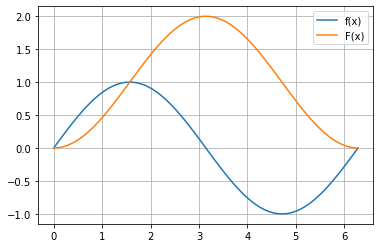

In [57]:
from scipy.integrate import cumtrapz
a = 0
b = 2*np.pi
n = 100
x = np.linspace(a,b,n+1)
f = lambda x:np.sin(x)
y = f(x)
F = cumtrapz(y,x,initial=0)
plt.plot(x,y,label='f(x)')
plt.plot(x,F,label='F(x)')
plt.grid()
plt.legend()
plt.show()

Note the `initial=0` argument adds a first value to $F$ which equals 0 (without this argument the length of $F$ will only include estimate over the points `x[1:]`, i.e. excluding the first point).

Unfortunately there is no equivalent function available for the other integration rules we have discussed. 
You could achieve something similar using a loop to calculate $F(x)$ at many different $x$ as previously described.
We will just stick with the cumulative trapezoidal rule for simplicity.

#### Exercise

 - Try estimating the integral function for a few different functions of your own choosing.

### The end

This concludes this lab notebook, I encourage you to keep playing around with these functions though to estimate integrals.